## PROJECT 1

---



DOMAIN: Botanical research

->CONTEXT: University X is currently undergoing some research involving understanding the characteristics of
plant and plant seedlings at various stages of growth. They already have have invested on curating sample
images. They require an automation which can create a classifier capable of determining a plant's species from a
photo

->DATA DESCRIPTION: The dataset comprises of images from 12 plant species. Source: https://www.kaggle.com/c/
plant-seedlings-classification/data

->PROJECT OBJECTIVE: University’s management require an automation which can create a classifier capable of
determining a plant's species from a photo


1. Import the data. Analyse the dimensions of the data. Visualise the data.

In [1]:
#Set tensorflow version
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import cv2
from tensorflow import keras
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
#Let us load the data
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project1')
path = '.'

In [ ]:
ls

17flowers/  imageclassifier_cnn.pkl  Prediction.zip  train/  train.zip


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project1/train.zip','r') as z:
    z.extractall()

KeyboardInterrupt: ignored

In [ ]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/Computer Vision/Project1'

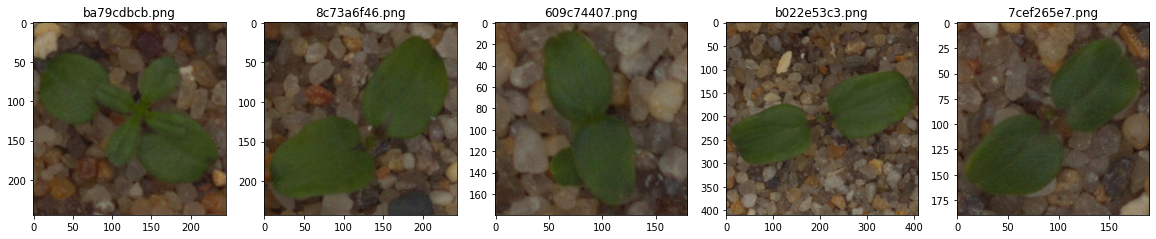

In [ ]:
#Let us take a look at 5 random images from the Cleavers folder of the train set
plt.figure(figsize=(20,20))
train_folder=r'/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project1/train/Cleavers'
for i in range(5):
    file = random.choice(os.listdir(train_folder))
    image_path= os.path.join(train_folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [ ]:
#Setting the image height and width
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder=r'/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project1/train'

In [ ]:
def create_dataset(img_folder):  
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
            image= cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(r'/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project1/train')

error: ignored

In [ ]:
#Shape of training dataset
img_data[0].shape

NameError: ignored

In [ ]:
len(img_data)

NameError: ignored

We can see that the training data contains 4767 images of size 200x200x3

In [ ]:
#Let us now see the number of images in each class
img_data = np.array(img_data)
class_name = np.array(class_name)
print("images shape: ", img_data.shape)
print("classes shape: ", class_name.shape)
  
for label in set(class_name):

  print("number of {} images is  -> {}".format(
        label, 
        len(img_data[class_name == label])))

In [ ]:
#Let us visualize our image data
values =[]
labels=[]
for label in set(class_name):
  values.append(len(img_data[class_name == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

Loose silky bent has the most number of images as seen from the graph.

In [ ]:
#Let us use Label encoder to encode the y data
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(class_name)

In [ ]:
y[0]

Split the data into train and validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_data, y, test_size=0.3, random_state=50)

In [ ]:
X_train.shape

In [ ]:
#Let us now create our test and validation set as 50 50
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=2)

In [ ]:
print(X_test.shape)
print(X_val.shape)

Basic NN model

In [ ]:
model=Sequential()

In [ ]:
  model.add(Dense(100, input_shape = (200, )))
  model.add(Activation('sigmoid'))
  model.add(Dense(10))
  model.add(Activation('sigmoid'))
  model.add(Dense(12))
  model.add(Activation('softmax'))

In [ ]:
sgd = optimizers.SGD(lr = 0.01)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 1)

CNN Model


In [ ]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,200,200, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

In [ ]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# I'm using colab for good resaon  :D 
# I put epochs = 50 and I waited until it reach a acceptable accuracy for me then I stopped the training at this point.
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)
history = model.fit(X_train, y_train, epochs = 10, validation_data = (X_val,Y_val),batch_size = batch_size)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
X_test.shape

In [ ]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

In [ ]:
#Model evaluation
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

From the above we can clearly see that CNN model is the best model for image classification with a test accuracy of over 90%.

In [ ]:
#Pickle the CNN model.
import pickle
x=10;
output = open('imageclassifier_cnn.pkl', 'wb')
pickle.dump(x,output)

In [ ]:
#Let us load the picked data now
from google.colab import files
files.download('imageclassifier_cnn.pkl')

#Import the the image in the “ Prediction” folder to predict the class. Display the image. Use the best trained image classifier model to predict the class.

In [ ]:
Predicted_classes = model.predict_classes(X_test)
wrong_preds = X_test[Predicted_classes != np.argmax(y_test)]
set(Predicted_classes)
i = 10
pred = model.predict_classes(np.array([wrong_preds[i]]))[0]
act = np.argmax(y_test[i])
print("Predicted class: {}".format(enc.classes_[pred]))
print("Actual class: {}".format(enc.classes_[act]))

plt.imshow(wrong_preds[i])


In [ ]:
enc.inverse_transform(np.array([y_test[10]]))

In [ ]:
plt.imshow(X_test[10])

In [ ]:
enc.classes_

# **PROJECT 2**


---



Explain in depth why CNN out performs neural networks which in turn out perform supervised learning
models when it comes to image classification. Use the markdown option in Jupiter for your answer.


1.   They reduce the number of units in the network (since they are many-to-one mappings). This means, there are fewer parameters to learn which reduces the chance of overfitting as the model would be less complex than a fully connected network.

2.   They consider the context/shared information in the small neighborhoods. This feature is very important in many applications such as image, video, text, and speech processing/mining as the neighboring inputs (eg pixels, frames, words, etc) usually carry related information.

3.  While a supervised learning model makes decisions according to what it has learned from the data, a Neural Network arranges algorithms in a fashion that it can make accurate decisions by itself. Thus, although supervised learning models can learn from data, in the initial stages, they may require some human intervention.

# **PROJECT 3**

---



DOMAIN: Automobile

CONTEXT: A brand research company wants to understand which cars or car manufacturers are popular in a
certain area of the city or locality. Company has a team which takes pictures of the cars randomly through the
day. Using this the company wants to set up an automation which can classify the make of the car once the
picture has been given as an input.

TASK: Help to build the image dataset to be used by the AI team to build an image classifier data. Import and
display the images in python against their labels. Comment on the challenges faced during this task.

In [ ]:
import os
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project3/Cars Images')
path = '.'

In [15]:
#let us take a look at the different cars
car_images=r'/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project3/Cars Images'
plt.figure(figsize=(25,25))
for i in range(15):
    file = random.choice(os.listdir(car_images))
    image_path= os.path.join(car_images, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(5,3,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

The classes in which the cars need to be classified have not been provided to us. So, taking a look at the cars, we can classify them into the following types:

1. Sedan
2. SUV
3. Pickup Truck
4. Minivan


In [26]:
def create_dataset(img_folder):  
    img_data_array=[]
    class_name=[]
    for file in os.listdir(car_images):
        image_path= os.path.join(car_images,  file)
        image= cv2.imread( image_path, cv2.COLOR_BGR2RGB)
        image= cv2.resize(image, (200, 200),interpolation = cv2.INTER_AREA)
        image=np.array(image)
        image = image.astype('float32')
        image /= 255 
        img_data_array.append(image)
        class_name.append(file)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name =create_dataset(car_images)

In [45]:
class_name[13]

'00010.jpg'

In [46]:
class_name[0]="sedan"
class_name[1]="pickup_truck"
class_name[2]="minivan"
class_name[3]="sedan"
class_name[4]="pickup_truck"
class_name[5]="sedan"
class_name[6]="sedan"
class_name[7]="sedan"
class_name[8]="sedan"
class_name[9]="SUV"
class_name[10]="pickup_truck"
class_name[11]="sedan"
class_name[12]="sedan"
class_name[13]="minivan"
class_name[14]="minivan"

Text(0.5, 0.98, 'Categorical Plotting')

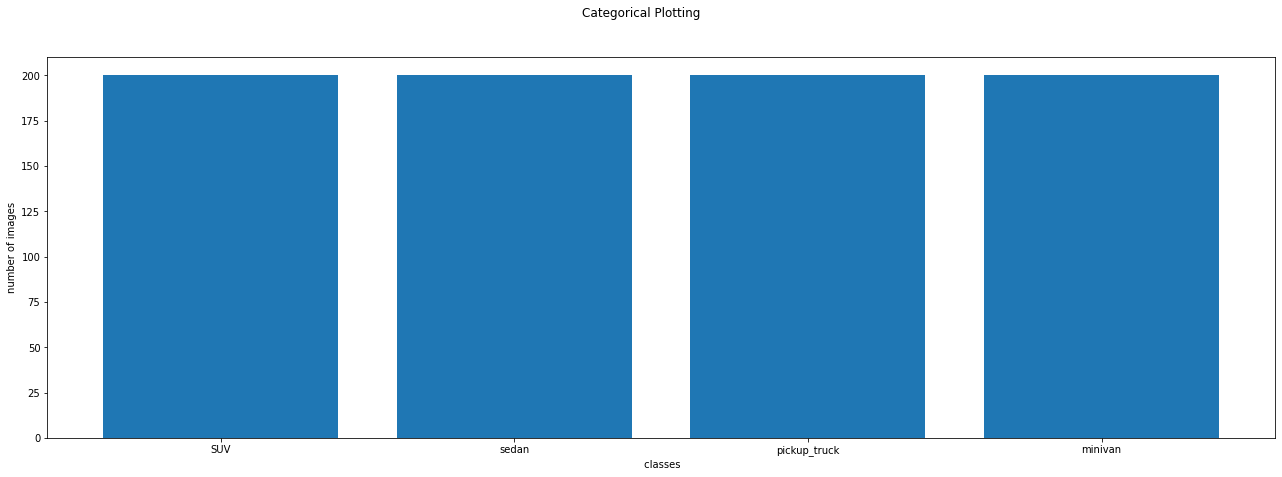

In [47]:
#Let us visualize our image data
values =[]
labels_new=[]
for label in set(class_name):
  values.append(len(img_data[class_name == label]))
  labels_new.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels_new, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [48]:
#Let us use Label encoder to encode the y data
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(class_name)

In [50]:
y

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0]])

In [51]:
img_data

[array([[[0.14509805, 0.15294118, 0.27058825],
         [0.14509805, 0.15294118, 0.27058825],
         [0.14901961, 0.15686275, 0.27450982],
         ...,
         [0.16862746, 0.18431373, 0.29411766],
         [0.16862746, 0.18431373, 0.29411766],
         [0.16078432, 0.1764706 , 0.28627452]],
 
        [[0.14117648, 0.14901961, 0.26666668],
         [0.14117648, 0.14901961, 0.26666668],
         [0.14509805, 0.15294118, 0.27058825],
         ...,
         [0.16470589, 0.18039216, 0.2901961 ],
         [0.16470589, 0.18039216, 0.2901961 ],
         [0.16078432, 0.1764706 , 0.28627452]],
 
        [[0.14117648, 0.14901961, 0.26666668],
         [0.14509805, 0.15294118, 0.27058825],
         [0.14509805, 0.15294118, 0.27058825],
         ...,
         [0.16470589, 0.18039216, 0.2901961 ],
         [0.16470589, 0.18039216, 0.2901961 ],
         [0.16078432, 0.1764706 , 0.28627452]],
 
        ...,
 
        [[0.28627452, 0.30588236, 0.3372549 ],
         [0.28627452, 0.30980393, 0.33725

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_data, y, test_size=0.3, random_state=50)

In [61]:
#Let us now create our test and validation set as 50 50
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=2)

In [55]:
X_train[0]

array([[[0.34509805, 0.39215687, 0.43137255],
        [0.34901962, 0.39607844, 0.43529412],
        [0.36078432, 0.40784314, 0.44705883],
        ...,
        [0.6745098 , 0.7294118 , 0.80784315],
        [0.6745098 , 0.7294118 , 0.8039216 ],
        [0.6627451 , 0.7176471 , 0.7921569 ]],

       [[0.34901962, 0.39607844, 0.43529412],
        [0.34901962, 0.39607844, 0.43529412],
        [0.36078432, 0.40784314, 0.44705883],
        ...,
        [0.6745098 , 0.7294118 , 0.8039216 ],
        [0.6745098 , 0.7294118 , 0.8039216 ],
        [0.6627451 , 0.7176471 , 0.7921569 ]],

       [[0.3529412 , 0.4       , 0.4392157 ],
        [0.3529412 , 0.4       , 0.4392157 ],
        [0.36078432, 0.40784314, 0.44705883],
        ...,
        [0.6745098 , 0.7294118 , 0.8039216 ],
        [0.6745098 , 0.7294118 , 0.8039216 ],
        [0.6627451 , 0.7176471 , 0.7921569 ]],

       ...,

       [[0.6       , 0.54509807, 0.45882353],
        [0.58431375, 0.5294118 , 0.4392157 ],
        [0.5921569 , 0

In [56]:
y_train[0]

array([0, 0, 0, 1])

In [59]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,200,200, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(200, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4, activation = "softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 200, 200, 32)      2432      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 200, 200, 32)      25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)       

In [60]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [63]:
model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = 5)
car_cnn_history = model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

ValueError: ignored

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

The challenges faced during creating the classifier was that the data was not labelled, which is why it was a tedious task to identify each image and assign a label to it. Since the dataset was small it was possible, but for a huge dataset manual labelling of the data is not possible at all

# **PROJECT 4**


---



DOMAIN: Botanical research

CONTEXT: University X is currently undergoing some research involving understanding the characteristics of
flowers. They already have have invested on curating sample images. They require an automation which can
create a classifier capable of determining a flower’s species from a photo

DATA DESCRIPTION: The dataset comprises of images from 17 plant species. It can be downloaded from
TensorFlow [ Hint: import tflearn.datasets.oxflower17 as oxflower17 ]

PROJECT OBJECTIVE: Company’s management requires an automation which can create a classifier capable of
determining a flower’s species from a photo

In [ ]:
!pip install tflearn

     |████████████████████████████████| 112kB 22.2MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=9c4f8357b50b71e40b76ea59815f5d6fb52bf4a7ddf6128c5977c4cef6696579
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [ ]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.optimizers import Adam

#Load oxflower17 dataset
import tflearn.datasets.oxflower17 as oxflower17
from sklearn.model_selection import train_test_split

In [ ]:
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True)
np.savez_compressed('oxflower17', X=X, Y=Y)

In [ ]:
#Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle = True)

In [ ]:
#print shape of data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1088, 224, 224, 3)
(1088,)
(272, 224, 224, 3)
(272,)


6 16 10 8 6 12 16 12 4 2 
7 8 14 9 13 8 9 1 9 3 
9 7 8 9 3 14 3 12 15 3 
0 2 14 12 3 14 6 14 12 7 
7 11 5 2 9 5 13 5 16 1 
7 14 16 15 9 4 1 12 15 1 
6 9 5 9 13 2 2 15 2 15 
8 6 12 8 5 10 4 3 7 2 
6 5 6 1 5 9 16 14 12 15 
15 15 4 14 11 12 7 8 13 3 


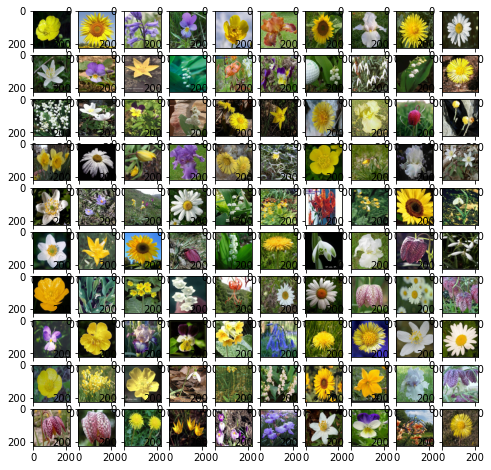

In [ ]:
#display the dataset
%matplotlib inline
import matplotlib.pyplot as plt

columns = 10
rows = 10

fig=plt.figure(figsize=(8, 8))

for i in range(1, columns*rows + 1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    print (y_test[i], end=' ')
    if i % columns == 0:
      print ("")
    plt.imshow(img, cmap='gray')

plt.show()

In [ ]:
#Display labels
import os
images=[]
labels=[]
total=len(X_train)
j=1
for i in range(1, total): 
    fname="/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project4/17flowers/jpg/image_"    
    fpath = os.path.join(fname + str(i).zfill(4) + ".jpg")
    images.append(fpath)
    labels.append(j) #labels are created as well
    if i%80==0: j+=1

In [ ]:
#Display images and labels
images = np.asarray(images)
labels = np.asarray(labels)

In [ ]:
images

array(['/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project4/17flowers/jpg/image_0001.jpg',
       '/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project4/17flowers/jpg/image_0002.jpg',
       '/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project4/17flowers/jpg/image_0003.jpg',
       ...,
       '/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project4/17flowers/jpg/image_1085.jpg',
       '/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project4/17flowers/jpg/image_1086.jpg',
       '/content/gdrive/MyDrive/Colab Notebooks/Computer Vision/Project4/17flowers/jpg/image_1087.jpg'],
      dtype='<U93')

In [ ]:
labels

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


Text(0.5, 0.98, 'Categorical Plotting')

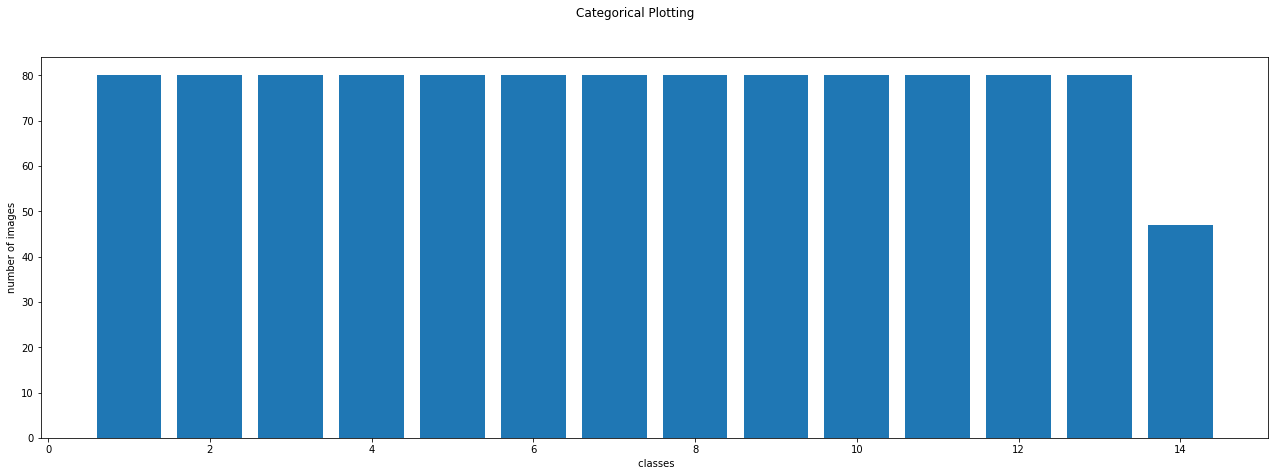

In [ ]:
#Let us visualize our image data
values =[]
labels_new=[]
for label in set(labels):
  values.append(len(images[labels == label]))
  labels_new.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels_new, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [ ]:
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

img = ndimage.imread('galaxies.png')
plt.imshow(img, interpolation='nearest')
plt.show()
# Note the 0 sigma for the last axis, we don't wan't to blurr the color planes together!
img = ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)
plt.imshow(img, interpolation='nearest')
plt.show()

6 

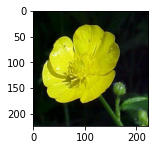

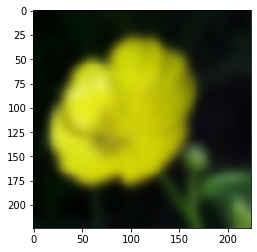

In [ ]:
#blur 5 images
import numpy as np
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt

columns = 10
rows = 10

fig=plt.figure(figsize=(25,25))

for i in range(1,2):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    print (y_test[i], end=' ')
    if i % columns == 0:
      print ("")
    #blur image
    img_blur = ndimage.gaussian_filter(img, sigma=(5, 5, 0), order=0)
    plt.imshow(img)
    plt.show()
    plt.imshow(img_blur, interpolation='nearest')
    plt.show()



In [ ]:
#Let us normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [ ]:
print("X_train shape:", X_train.shape)
print("Images in X_train:", X_train.shape[0])
print("Images in X_test:", X_test.shape[0])

X_train shape: (1088, 224, 224, 3)
Images in X_train: 1088
Images in X_test: 272


In [ ]:
#One hot encode the class vector
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=17)
y_test = to_categorical(y_test, num_classes=17)

Label:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


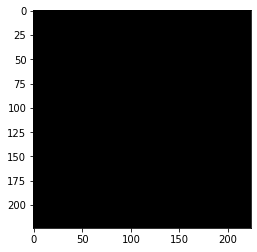

In [ ]:
#Display dataset after one hot encoding
print("Label: ", y_train[0])
plt.imshow(X_train[0], cmap='gray')

In [ ]:
num_classes = y_test.shape[1]

Train tune and test AIML image classifier model using:
1. Neural network model

In [ ]:
# define model

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def nn_model():
    # create model
    model = Sequential()  
    model.add(Flatten())
    model.add(Dense(256, activation='relu')) 
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [ ]:
# build the model
neural_network_model = nn_model()

In [ ]:
# Compile model
sgd = optimizers.Adam(lr=1e-3)
neural_network_model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy']) ### Loss function = Categorical cross entropy

In [ ]:
# Fit the model
training_history = neural_network_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300, verbose=2)

Train on 1088 samples, validate on 272 samples
Epoch 1/100
1088/1088 - 3s - loss: 2.8331 - acc: 0.0551 - val_loss: 2.8216 - val_acc: 0.0772
Epoch 2/100
1088/1088 - 0s - loss: 2.8090 - acc: 0.0597 - val_loss: 2.7991 - val_acc: 0.0772
Epoch 3/100
1088/1088 - 0s - loss: 2.7696 - acc: 0.0726 - val_loss: 2.7589 - val_acc: 0.1066
Epoch 4/100
1088/1088 - 0s - loss: 2.7179 - acc: 0.0983 - val_loss: 2.7168 - val_acc: 0.1103
Epoch 5/100
1088/1088 - 0s - loss: 2.6497 - acc: 0.0974 - val_loss: 2.6519 - val_acc: 0.1324
Epoch 6/100
1088/1088 - 0s - loss: 2.5775 - acc: 0.1204 - val_loss: 2.5948 - val_acc: 0.1471
Epoch 7/100
1088/1088 - 0s - loss: 2.5007 - acc: 0.1379 - val_loss: 2.5198 - val_acc: 0.2096
Epoch 8/100
1088/1088 - 0s - loss: 2.4185 - acc: 0.2022 - val_loss: 2.4539 - val_acc: 0.2316
Epoch 9/100
1088/1088 - 0s - loss: 2.3279 - acc: 0.2546 - val_loss: 2.3823 - val_acc: 0.2426
Epoch 10/100
1088/1088 - 0s - loss: 2.2489 - acc: 0.2960 - val_loss: 2.3339 - val_acc: 0.2647
Epoch 11/100
1088/1088

In [ ]:
training_history = neural_network_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=600, batch_size=300, verbose=2)

Train on 1088 samples, validate on 272 samples
Epoch 1/600
1088/1088 - 0s - loss: 0.1021 - acc: 0.9954 - val_loss: 2.3251 - val_acc: 0.4816
Epoch 2/600
1088/1088 - 0s - loss: 0.1009 - acc: 0.9954 - val_loss: 2.3347 - val_acc: 0.4706
Epoch 3/600
1088/1088 - 0s - loss: 0.0971 - acc: 0.9982 - val_loss: 2.3282 - val_acc: 0.4779
Epoch 4/600
1088/1088 - 0s - loss: 0.0954 - acc: 0.9982 - val_loss: 2.3484 - val_acc: 0.4669
Epoch 5/600
1088/1088 - 0s - loss: 0.0910 - acc: 0.9982 - val_loss: 2.3858 - val_acc: 0.4669
Epoch 6/600
1088/1088 - 0s - loss: 0.0851 - acc: 0.9982 - val_loss: 2.3785 - val_acc: 0.4779
Epoch 7/600
1088/1088 - 0s - loss: 0.0829 - acc: 0.9991 - val_loss: 2.4377 - val_acc: 0.4669
Epoch 8/600
1088/1088 - 0s - loss: 0.0860 - acc: 0.9963 - val_loss: 2.4214 - val_acc: 0.4706
Epoch 9/600
1088/1088 - 0s - loss: 0.0826 - acc: 0.9982 - val_loss: 2.4361 - val_acc: 0.4706
Epoch 10/600
1088/1088 - 0s - loss: 0.0753 - acc: 0.9991 - val_loss: 2.4614 - val_acc: 0.4743
Epoch 11/600
1088/1088

In [ ]:
# Final evaluation of the model
scores = neural_network_model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 2.2630286777720734
Accuracy: 0.48897058


In [ ]:
neural_network_model.metrics_names

['loss', 'acc']

Text(0.5, 1.0, 'Training and validation loss')

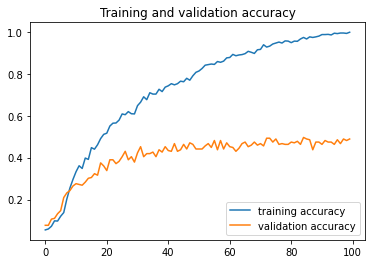

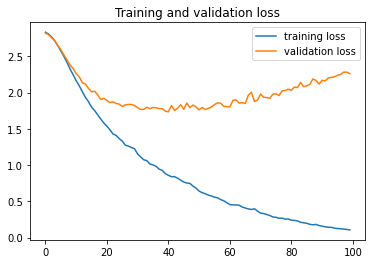

In [ ]:
#plotting the curve
accuracy = training_history.history['acc']
val_accuracy  = training_history.history['val_acc']
loss     = training_history.history['loss']
val_loss = training_history.history['val_loss']

epochs   = range(len(accuracy)) # Get number of epochs

plt.plot  ( epochs, accuracy, label = 'training accuracy' )
plt.plot  ( epochs, val_accuracy, label = 'validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot  ( epochs, loss, label = 'training loss' )
plt.plot  ( epochs, val_loss, label = 'validation loss' )
plt.legend(loc = 'upper right')
plt.title ('Training and validation loss'   )

Thus, we can see here that we tried to train a neural network without any convolutions but it gave an accuracy of only 48.8% which is very less.
We will now try with CNN


CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

# Initialize the model
model_cnn = Sequential()

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model_cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(224,224,3)))

# Add a Convolutional Layer with 32 filters of size 3X3 and activation function as 'relu' 
model_cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu"))

# Add a MaxPooling Layer of size 2X2 
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Apply Dropout with 0.2 probability 
model_cnn.add(Dropout(rate=0.2))

# Flatten the layer
model_cnn.add(Flatten())

# Add Fully Connected Layer with 128 units and activation function as 'relu'
model_cnn.add(Dense(224, activation="relu"))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model_cnn.add(Dense(17, activation="softmax"))

In [ ]:
# Compile the model
model_cnn.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

# Use earlystopping
callback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, min_delta=0.01)

# Fit the model
cnn_history = model_cnn.fit(x=X_train, y=y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[callback])

Train on 1088 samples, validate on 272 samples
Epoch 1/10
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.8363 - acc: 0.0579 - val_loss: 2.8344 - val_acc: 0.0404
Epoch 2/10
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.8333 - acc: 0.0542 - val_loss: 2.8357 - val_acc: 0.0331
Epoch 3/10
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.8331 - acc: 0.0506 - val_loss: 2.8366 - val_acc: 0.0404
Epoch 4/10
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.8329 - acc: 0.0634 - val_loss: 2.8373 - val_acc: 0.0404
Epoch 5/10
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.8328 - acc: 0.0634 - val_loss: 2.8380 - val_acc: 0.0404
Epoch 6/10
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.8326 - acc: 0.0634 - val_loss: 2.8388 - val_acc: 0.0404
Epoch 7/10
1088/1088 [==============================] - 3s 3ms/sample - loss: 2.8326 - acc: 0.0570 - val_loss: 2.8395 - val_acc: 0.0331
E

In [ ]:
# Final evaluation of the model
scores = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 2.8406302227693447
Accuracy: 0.033088237


Use existing model for training. We wil use Alexnet

In [ ]:
#Data augumentation with Keras tools
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

#Build AlexNet model
def AlexNet(width, height, depth, classes):
    
    model = Sequential()
    
    #First Convolution and Pooling layer
    model.add(Conv2D(96,(11,11),strides=(4,4),input_shape=(width,height,depth),padding='valid',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Second Convolution and Pooling layer
    model.add(Conv2D(256,(5,5),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Three Convolution layer and Pooling Layer
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(384,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(Conv2D(256,(3,3),strides=(1,1),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    
    #Fully connection layer
    model.add(Flatten())
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000,activation='relu'))
    model.add(Dropout(0.5))
    
    #Classfication layer
    model.add(Dense(classes,activation='softmax'))

    return model

In [ ]:
AlexNet_model = AlexNet(224,224,3,17)
AlexNet_model.summary()
AlexNet_model.compile(optimizer=Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

#Start training using dataaugumentation generator
History = AlexNet_model.fit_generator(img_gen.flow(X_train*255, y_train, batch_size = 16),
                                      steps_per_epoch = len(X_train)/16, validation_data = (X_test,y_test), epochs = 30 )

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 384)       885120    
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 384)       1327488   
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 12, 12, 256)      

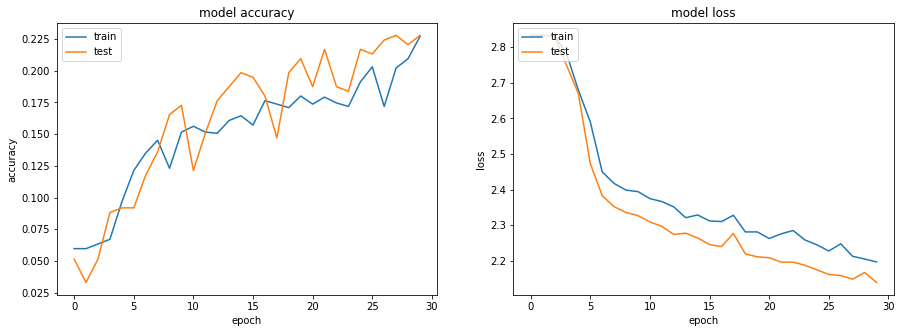

In [ ]:
#Plot Loss and Accuracy
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()

In [ ]:
# Final evaluation of the model
scores = AlexNet_model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 2.1390688980326935
Accuracy: 0.22794117


VGGNet

In [ ]:
# use vgg16 pre-trained model with trainable densely connected output layer

from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers except for the last layer: 
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
vgg_model = models.Sequential()
 
# Add the vgg convolutional base model
vgg_model.add(vgg_conv)
 
# Add new layers
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dense(1024, activation='relu'))
vgg_model.add(layers.Dropout(0.5))
vgg_model.add(layers.Dense(17, activation='softmax'))
vgg_model.summary() 

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_11 (Flatten)         (None, 25088)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 1024)              25691136  
_________________________________________________________________
dropout_11 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 17)                17425     
Total params: 40,423,249
Trainable params: 32,787,985
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
# image augmentation for train set and image resizing for validation
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator( # this function will generate augmented images in real time
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
vgg_model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4), # learning rate should be small so previously learned weights don't vanish
              metrics=['acc', 'top_k_categorical_accuracy'])

In [ ]:
vgg_History = vgg_model.fit_generator(img_gen.flow(X_train*255, y_train, batch_size = 16),
                                      steps_per_epoch = len(X_train)/16, validation_data = (X_test,y_test), epochs = 30 )

Epoch 1/30
68/68 [==============================] - 17s 181ms/step - batch: 33.5000 - size: 16.0000 - loss: 3.0657 - acc: 0.0450 - top_k_categorical_accuracy: 0.2546 - val_loss: 2.8335 - val_acc: 0.0404 - val_top_k_categorical_accuracy: 0.2353
Epoch 2/30
68/68 [==============================] - 12s 180ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.8333 - acc: 0.0662 - top_k_categorical_accuracy: 0.2812 - val_loss: 2.8338 - val_acc: 0.0404 - val_top_k_categorical_accuracy: 0.2316
Epoch 3/30
68/68 [==============================] - 12s 182ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.8332 - acc: 0.0607 - top_k_categorical_accuracy: 0.2849 - val_loss: 2.8340 - val_acc: 0.0404 - val_top_k_categorical_accuracy: 0.2206
Epoch 4/30
68/68 [==============================] - 12s 182ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.8332 - acc: 0.0551 - top_k_categorical_accuracy: 0.3097 - val_loss: 2.8342 - val_acc: 0.0404 - val_top_k_categorical_accuracy: 0.2206
Epoch 5/30
68/68 [======

In [ ]:
# Final evaluation of the model
scores = vgg_model.evaluate(X_test, y_test, verbose=0)
print("Loss:", scores[0])
print("Accuracy:", scores[1])

Loss: 2.8403152858509735
Accuracy: 0.033088237


In [ ]:
vgg_model.evaluate(X_test, y_test)

[2.8403152858509735, 0.033088237, 0.22058824]

In [ ]:
AlexNet_model.evaluate(X_test, y_test)

[2.1390688980326935, 0.22794117]

In [ ]:
model_cnn.evaluate(X_test, y_test)

[2.8406302227693447, 0.033088237]

In [ ]:
neural_network_model.evaluate(X_test, y_test)

[4.522303889779484, 0.48161766]

Predicted label: 0
Softmax Outputs: [[7.2663754e-01 1.1521945e-20 5.3182243e-15 4.7826692e-03 1.6470967e-01
  3.2549095e-05 5.3007272e-03 1.3283274e-16 8.0469043e-12 7.8950084e-13
  0.0000000e+00 3.1957831e-29 1.5651124e-06 1.1750562e-09 9.8534584e-02
  1.2679425e-18 7.1606058e-07]]
1.0


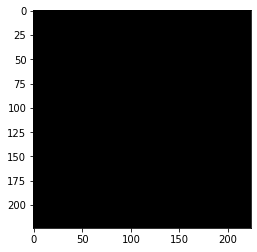

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100])
y_pred = neural_network_model.predict(X_test[100].reshape(1, 224, 224, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 11
Softmax Outputs: [[0.06079298 0.06235832 0.05970263 0.05644963 0.0590804  0.05851237
  0.05965396 0.060784   0.05732894 0.05664848 0.05917346 0.06307264
  0.05669247 0.05754173 0.05901993 0.05751759 0.05567043]]
1.0


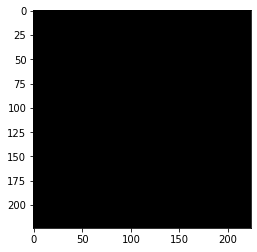

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100])
y_pred = model_cnn.predict(X_test[100].reshape(1, 224, 224, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 4
Softmax Outputs: [[1.1110987e-01 4.6685126e-04 2.6355952e-04 1.6028325e-01 3.0239430e-01
  1.9062068e-02 2.0712514e-01 2.5270952e-04 5.2589958e-04 1.5199251e-03
  6.2447059e-04 4.2231317e-04 7.0684887e-03 1.4709287e-02 5.8615509e-02
  3.7575210e-04 1.1518061e-01]]
1.0


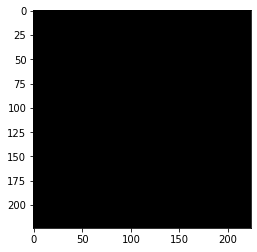

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100])
y_pred = AlexNet_model.predict(X_test[100].reshape(1, 224, 224, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Predicted label: 11
Softmax Outputs: [[0.06051897 0.06206542 0.06013398 0.05719627 0.05889555 0.05829651
  0.05960012 0.06084391 0.0573905  0.05602465 0.0591291  0.06289896
  0.05657129 0.05819314 0.05856822 0.057686   0.05598748]]
1.0


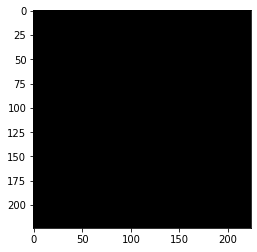

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_test[100])
y_pred = vgg_model.predict(X_test[100].reshape(1, 224, 224, 3))
print("Predicted label:", y_pred.argmax())
print("Softmax Outputs:", y_pred)
print(y_pred.sum())

Compare the results from the above step along with your detailed observations.

We know that CNN is best for image classification, but in this case our neural network model has performed better than all other models, with a better accuracy than the others, and a minimal loss

# **PROJECT 5**

---
Explain in depth your strategy to maintain and support the AIML image classifier after it in production.


->The expectation is that a machine learning model will continuously and automatically identify where it makes mistakes, find optimal ways to rectify those mistakes, and incorporate those changes in the system, all with almost no human intervention.
This is a very difficult process since it requires a good amount of data to be trained.

-> Therefore I have an option to continuously monitor the process and check if the process performs with a good accuracy.

-> I need to monitor the model to check if it encounters any outliers.

-> If we find a trend in the outlier data, I can retrain the model once again so as to accomodate the outliers.

->I will put in alerts and processes so that I can fix and retrain the models that start performing inaccurately in production.